In [1]:
#!pip install mpl_finance
#!pip install --upgrade mplfinance

In [2]:
# First import the libraries that we need to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns
from datetime import datetime

In [86]:
#The data was downloaded from yahoo in the following link: https://finance.yahoo.com/quote/BTC-USD/history/
#The date has to be manually changed on the website to obtain all the possible data
url = 'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1410912000&period2=1634515200&interval=1d&events=history&includeAdjustedClose=true'
bc = pd.read_csv(url)
bc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2584,2021-10-14,57372.832031,58478.734375,56957.074219,57321.523438,57321.523438,3.661579e+10
2585,2021-10-15,57345.902344,62757.128906,56868.144531,61593.949219,61593.949219,5.178008e+10
2586,2021-10-16,61609.527344,62274.476563,60206.121094,60892.179688,60892.179688,3.425096e+10
2587,2021-10-17,60887.652344,61645.523438,59164.468750,61553.617188,61553.617188,2.903237e+10


In [87]:
bc.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [88]:
print(bc[bc.isna().any(axis=1)])

            Date  Open  High  Low  Close  Adj Close  Volume
2039  2020-04-17   NaN   NaN  NaN    NaN        NaN     NaN
2214  2020-10-09   NaN   NaN  NaN    NaN        NaN     NaN
2217  2020-10-12   NaN   NaN  NaN    NaN        NaN     NaN
2218  2020-10-13   NaN   NaN  NaN    NaN        NaN     NaN


In [89]:
#Only 5 days did not have any information, it is easier to just drop those rows
bc = bc.dropna()
print(bc)

            Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2584  2021-10-14  57372.832031  58478.734375  56957.074219  57321.523438   
2585  2021-10-15  57345.902344  62757.128906  56868.144531  61593.949219   
2586  2021-10-16  61609.527344  62274.476563  60206.121094  60892.179688   
2587  2021-10-17  60887.652344  61645.523438  59164.468750  61553.617188   
2588  2021-10-18  61548.804688  62614.660156  60012.757813  62026.078125   

         Adj Close        Volume  
0       457.334015  2.105680e+07  
1       424.44000

In [7]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585 entries, 0 to 2588
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2585 non-null   object 
 1   Open       2585 non-null   float64
 2   High       2585 non-null   float64
 3   Low        2585 non-null   float64
 4   Close      2585 non-null   float64
 5   Adj Close  2585 non-null   float64
 6   Volume     2585 non-null   float64
dtypes: float64(6), object(1)
memory usage: 161.6+ KB


In [8]:
bc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2.585000e+03
mean,9440.183635,9709.107956,9152.887871,9463.208730,9463.208730,1.374584e+10
std,13845.719510,14264.270078,13386.815046,13882.274756,13882.274756,1.989186e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,577.752991,582.817993,573.429993,577.502991,577.502991,7.406470e+07
50%,5505.552246,5642.044434,5347.645996,5526.640137,5526.640137,4.566910e+09
75%,9698.502930,9908.796875,9507.637695,9700.414063,9700.414063,2.219800e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [90]:
#Creates a new column called 'Return' that is the percentage change from the previous column 
#on the adjusted closing price
bc['Return'] = bc['Adj Close'].pct_change()
bc.head()

<ipython-input-90-19810e2be86c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['Return'] = bc['Adj Close'].pct_change()


,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,-0.071926
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,-0.069843
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,0.035735
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,-0.024659


Text(0.5, 1.0, 'Opening Price vs. Date')

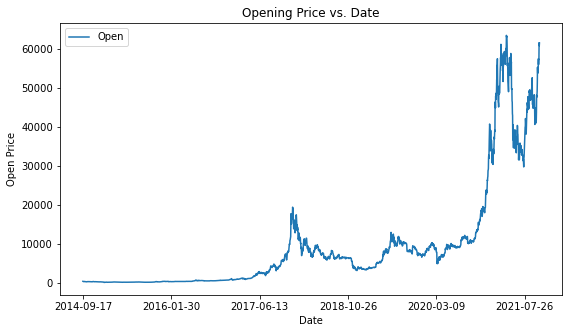

In [10]:
bc.plot('Date', 'Open', figsize = (9,5))
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Opening Price vs. Date')

Text(0.5, 1.0, 'Closing Price vs. Date')

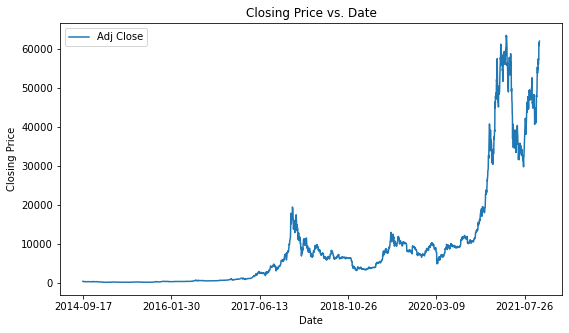

In [11]:
bc.plot('Date', 'Adj Close', figsize = (9,5))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price vs. Date')

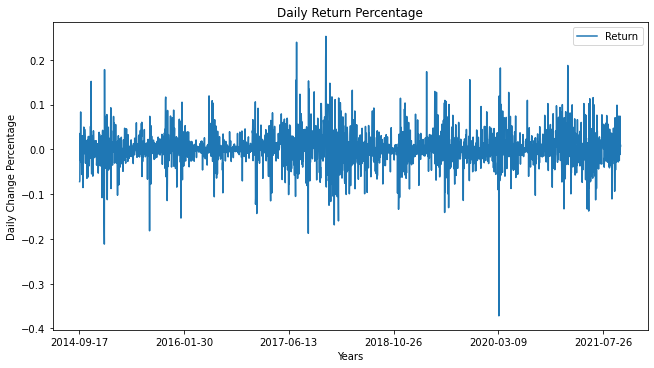

In [12]:
bc.plot('Date', 'Return', figsize=(9,5))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('Daily Change Percentage')
plt.title("Daily Return Percentage")
plt.show()

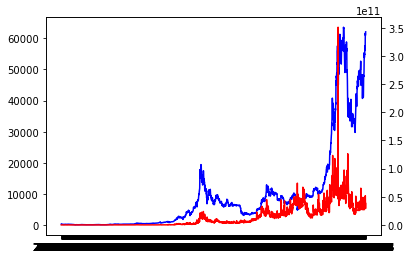

In [13]:
fig, ax = plt.subplots()
ax.plot(bc['Date'], bc['Adj Close'], color = 'blue')
ax2 = ax.twinx()
ax2.plot(bc['Date'], bc['Volume'], color = 'red')
plt.show()

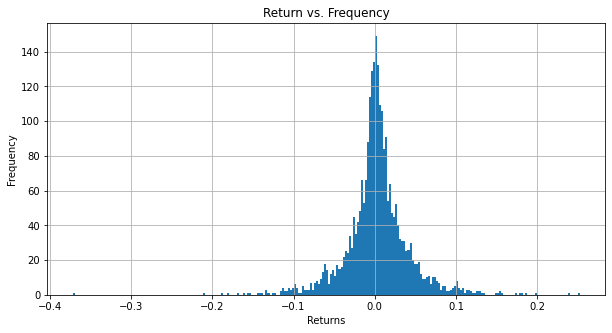

In [14]:
bc.hist('Return', bins = 250, figsize = (10,5))
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Return vs. Frequency')
plt.show()

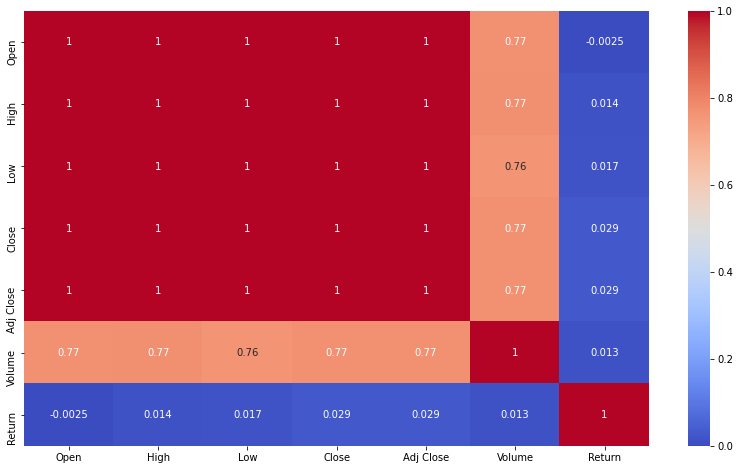

In [15]:
plt.figure(figsize=(14,8))
sns.heatmap(bc.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True);

From the heat map, the main attribute of test will be Volume. 

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Return'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

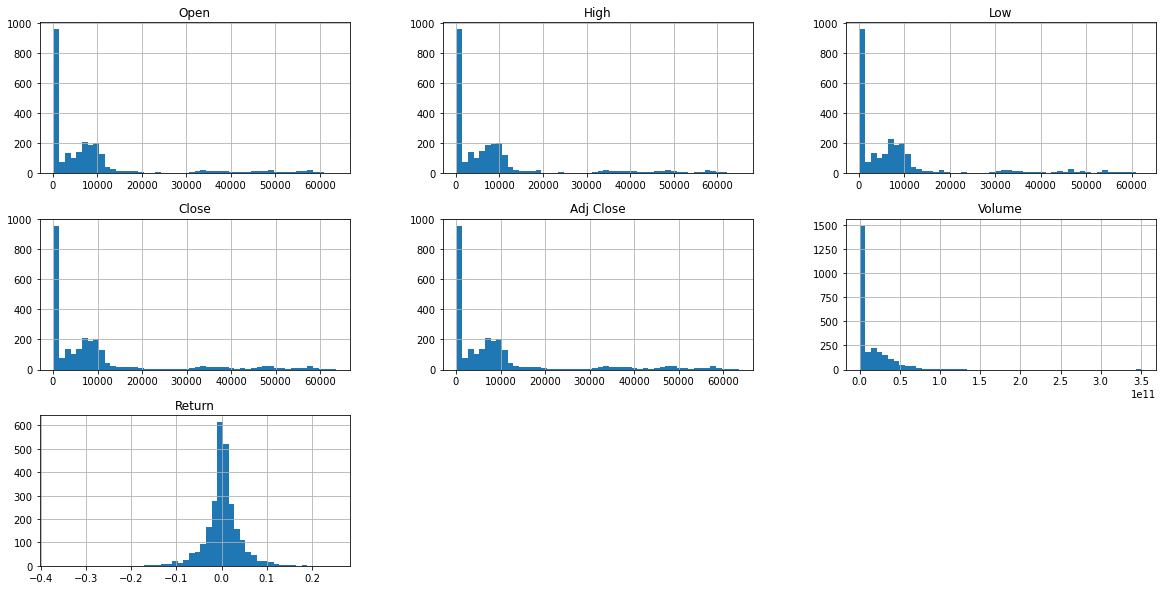

In [16]:
bc.hist(bins = 50, figsize = (20,10))

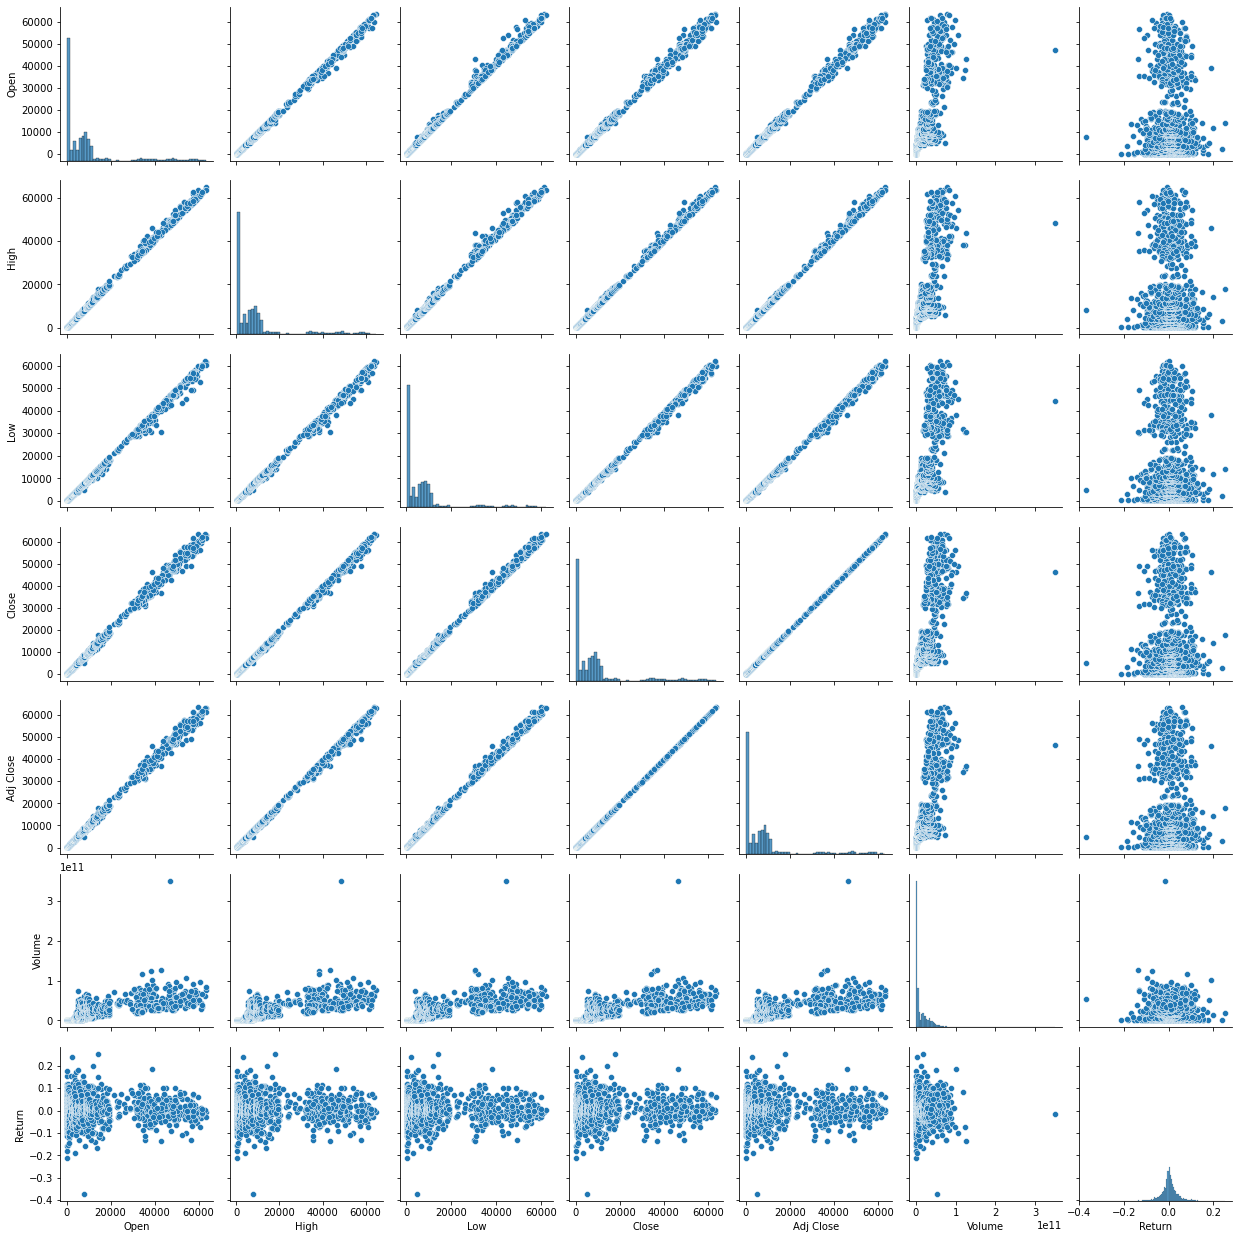

In [17]:
sns.pairplot(bc)

<AxesSubplot:ylabel='Density'>

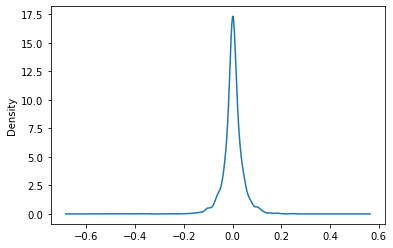

In [18]:
bc['Return'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

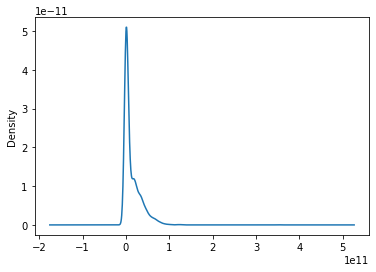

In [19]:
bc['Volume'].plot(kind = 'kde')

C:\Users\falda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\falda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

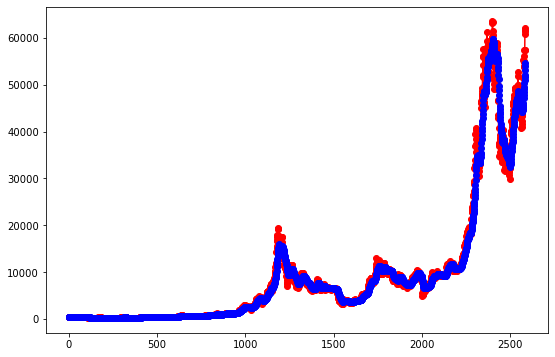

In [20]:
#exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(bc['Adj Close']).fit(smoothing_level = 0.1, optimized = False)
bc['Adj Close'].plot(marker = 'o', color = 'red', figsize = (9,6))
model.fittedvalues.plot(marker = 'o', color ='blue')

In [21]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

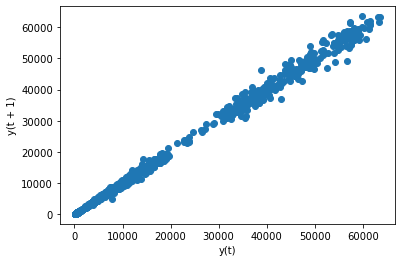

In [22]:
lag_plot(bc['Adj Close'])

This shows that the data are strongly non-random and further suggests that an autoregressive model might be appropriate. The tighter the data is clustered around the diagonal, the more autocorrelation is present.

A stationary time series is one whose properties do not depend on the time at which the series is observed. Bitcoin value varies to highly due to multiple factors such as social media and government policy. 

A positive linear trend is suggestive of positive autocorrelation.
The tighter the data is clustered around the diagonal, the more autocorrelation is present.

In [91]:
#Create a column to return the day of the week matching the date

bc['Date'] = pd.to_datetime(bc['Date']) #Had to redo otherwise errors appeared
week={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
bc['Day of Week'] = bc['Date'].dt.dayofweek.map(week)

bc.head()

<ipython-input-91-4d40445701f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['Date'] = pd.to_datetime(bc['Date']) #Had to redo otherwise errors appeared
<ipython-input-91-4d40445701f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['Day of Week'] = bc['Date'].dt.dayofweek.map(week)


,Date,Open,High,Low,Close,Adj Close,Volume,Return,Day of Week
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,NaN,Wed
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,-0.071926,Thu
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,-0.069843,Fri
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,0.035735,Sat
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,-0.024659,Sun


<ipython-input-24-5cf6f4e374cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['Date'] = pd.to_datetime(bc['Date']) #Had to redo otherwise errors appeared


<AxesSubplot:xlabel='Day of Week', ylabel='count'>

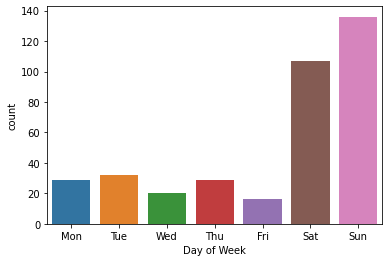

In [24]:
#Measure the volume traded per day
bc['Date'] = pd.to_datetime(bc['Date']) #Had to redo otherwise errors appeared

# count min value for each week day
idx = bc.groupby([pd.Grouper(key='Date', freq='W-MON')])['Volume'].transform(min) == bc['Volume']

# calculate data for days.
# W-MON = weekly frequency (Mondays)
lows_count = bc[idx].groupby([pd.Grouper(key='Date', freq='D')]).first().reset_index()
lows_count = lows_count.dropna()


sns.countplot(x='Day of Week',data=lows_count, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

I wanted to see which days had the largest trading volumes, and we see that those days are Saturday and Sunday

In [25]:
import mplfinance as mpf

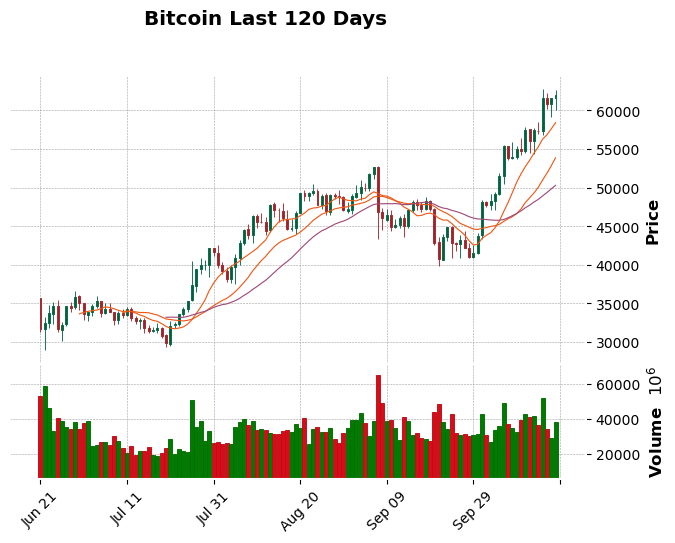

In [26]:
#Limit data so that it becomes easier to see
mpf.plot(bc.set_index('Date').tail(120), type='candle', style='charles', volume=True, 
        title='Bitcoin Last 120 Days', mav=(10,20,30)) #moving average

From the last 120 days, we see the price continues to fluctuate. A decrease in price occurred during the month of September 2021 and has since been on the rise again. 

# Pre-processing & Training Data Development

In [27]:
import fbprophet
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [28]:
from pandas import to_datetime
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

In [29]:
bc_prophet = bc[['Date','Adj Close']]
#rename columns to work with Prophet
bc_prophet.columns = ['ds', 'y']

In [30]:
#split the data to be trained on the first 2100 days and test those after to obtain a general outlook
bc_prophet=bc_prophet.dropna()
train_X= bc_prophet[:2100]
test_X= bc_prophet[2100:]

In [31]:
prophet= Prophet()
prophet.fit(train_X)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


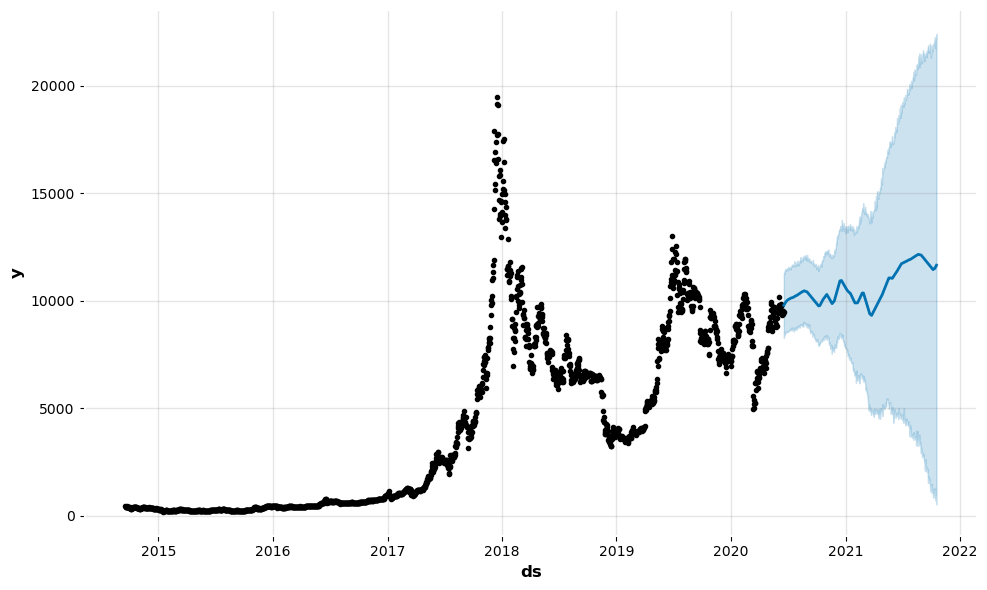

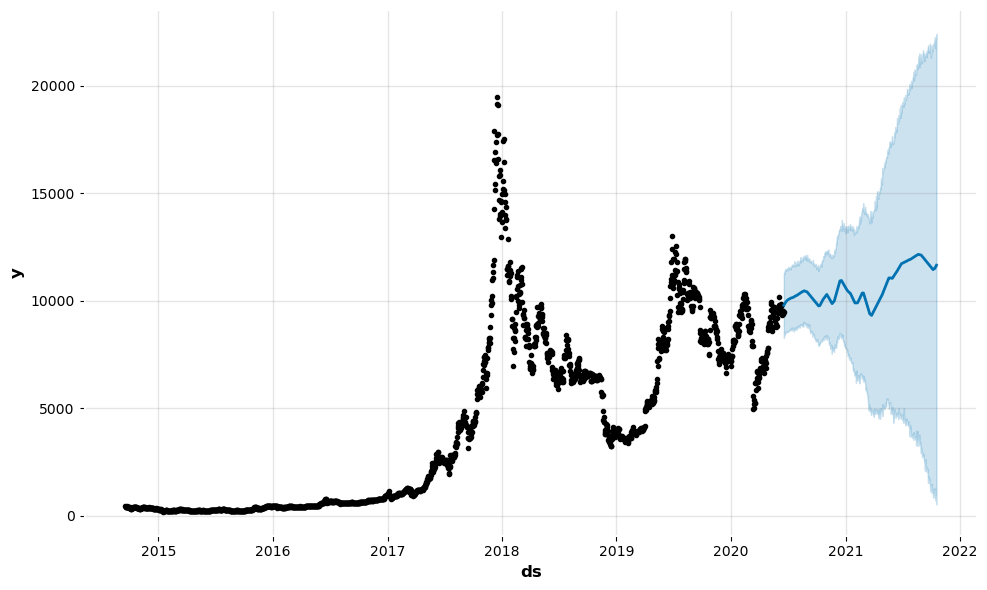

In [32]:
#Plot to get general view of the model
forecast_data = prophet.predict(test_X)
prophet.plot(forecast_data)

# Modeling

In [33]:
bc_date_adjclose = bc[['Date', 'Adj Close']]
#rename to the required format for prophet
bc_date_adjclose.columns = ['ds', 'y']
# define the model
model = Prophet()
# fit the model on the entire dataset
model.fit(bc_date_adjclose)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
#Make a dataframe for future predictions and specify the capacity in the future. 
#Predict next 100 days after the final date of October 18, 2021
future = model.make_future_dataframe(periods=100,freq='D')
forecast = model.predict(future)

# Prediction

In [35]:
#View the predicted 100 days
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(100)

,ds,yhat_lower,yhat_upper,yhat
2585,2021-10-19,49453.646822,60704.995467,54874.369553
2586,2021-10-20,49994.656400,60785.029936,55009.509780
2587,2021-10-21,49445.759603,60572.081525,55092.119848
2588,2021-10-22,49509.544084,60343.968189,55271.281753
2589,2021-10-23,49829.084378,60655.334375,55335.624388
...,...,...,...,...
2680,2022-01-22,59583.134926,71533.668525,65659.409027
2681,2022-01-23,59934.598968,71071.012716,65658.894188
2682,2022-01-24,60235.431758,71216.004012,65719.022529
2683,2022-01-25,60216.187989,71216.970687,65711.417681


In [36]:
#Rename the columns for better interpretation
col = ['ds', 'yhat_lower', 'yhat_upper', 'yhat']
forecast[col].rename(columns={'ds':'Date', 'yhat': 'Prediction', 'yhat_lower':'Lower Prediction',
                     'yhat_upper': 'Upper Prediction'}).tail(100)

,Date,Lower Prediction,Upper Prediction,Prediction
2585,2021-10-19,49453.646822,60704.995467,54874.369553
2586,2021-10-20,49994.656400,60785.029936,55009.509780
2587,2021-10-21,49445.759603,60572.081525,55092.119848
2588,2021-10-22,49509.544084,60343.968189,55271.281753
2589,2021-10-23,49829.084378,60655.334375,55335.624388
...,...,...,...,...
2680,2022-01-22,59583.134926,71533.668525,65659.409027
2681,2022-01-23,59934.598968,71071.012716,65658.894188
2682,2022-01-24,60235.431758,71216.004012,65719.022529
2683,2022-01-25,60216.187989,71216.970687,65711.417681


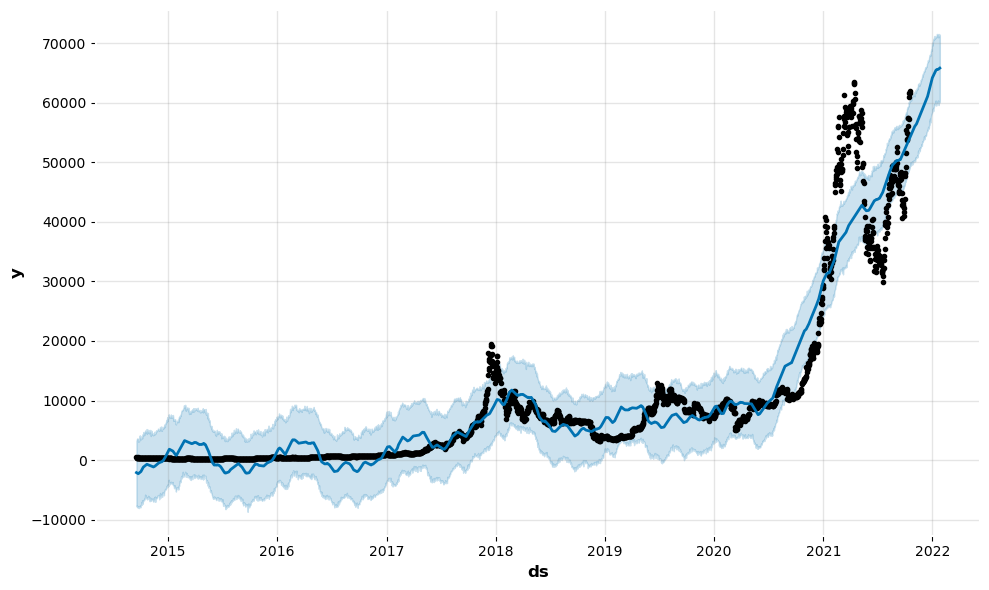

In [37]:
#Plotting the predicted values 
plot1 = model.plot(forecast)

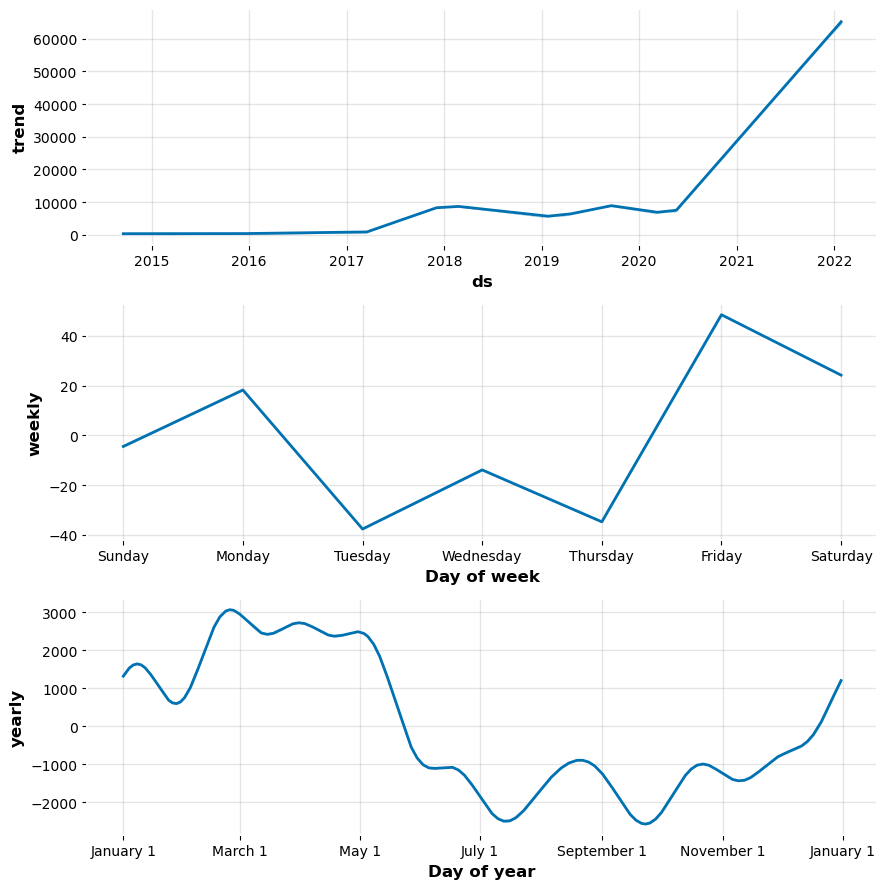

In [38]:
#Plotting the Forecasted components(Trend and Seasonality)
plt2 = model.plot_components(forecast)

# Hyperparameter Tuning

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:

In [39]:
import itertools

param_grid = {'changepoint_prior_scale': [0.001, 0.01, 0.07, 0.08, 0.09, 0.1, 0.2, 0.5]}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(bc_date_adjclose)  # Fit model with given params
    df_cv = cross_validation(m, horizon='100 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2015-10-10 00:00:00 and 2021-07-10 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000211B507DFA0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2015-10-10 00:00:00 and 2021-07-10 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000211B5085C70>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2015-10-10 00:00:00 and 2021-07-10 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000211B1737670>
INFO:fbprophet:Disabling daily season

   changepoint_prior_scale          rmse
0                    0.001  11328.910912
1                    0.010   9008.865811
2                    0.070   8639.874321
3                    0.080   8567.167403
4                    0.090   8529.439178
5                    0.100   8485.303696
6                    0.200   8514.011129
7                    0.500   8700.425324


# Forecasting Historical Data w/ Tuned Model

In [45]:
from datetime import date, timedelta

In [46]:
#define the period for which we want a prediction
#prediction over last year of the data collected 
future1 = list()
start_date = date(2020, 10, 18)
end_date = date(2021, 10, 18)
delta = timedelta(days=1)
while start_date <= end_date:
    future1.append([start_date])
    start_date += delta
future1 = pd.DataFrame(future1)
future1.columns = ['ds']
future1['ds']= to_datetime(future1['ds'])

In [47]:
# use the model to make a forecast
t_model = Prophet(changepoint_prior_scale = 0.1)
t_model.fit(bc_date_adjclose)
forecast1 = t_model.predict(future1)
# summarize the forecast
print(forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat    yhat_lower    yhat_upper
0 2020-10-18  19183.082936  13608.756126  24002.012497
1 2020-10-19  19336.030414  14019.403197  24879.609769
2 2020-10-20  19406.182111  14426.530805  24417.948884
3 2020-10-21  19547.813132  14521.507826  25065.923987
4 2020-10-22  19637.736638  14745.432231  24803.436589


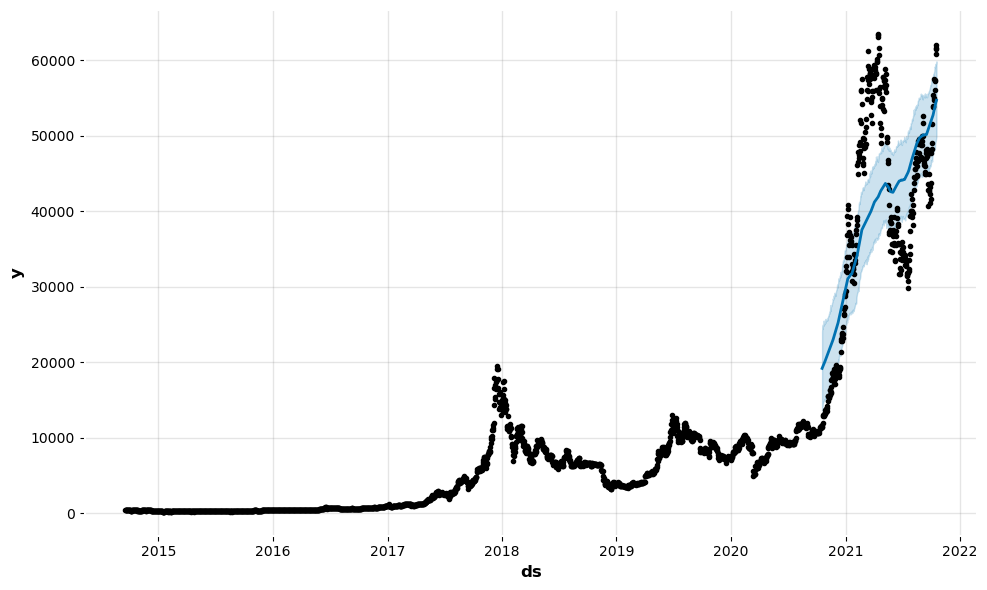

In [48]:
# plot forecast
t_model.plot(forecast1)
plt.show()

In [49]:
from sklearn.metrics import mean_absolute_error

In [50]:
# calculate MAE between expected and predicted values
y_true = bc_date_adjclose['y'][-366:].values
y_pred = forecast1['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 7784.963


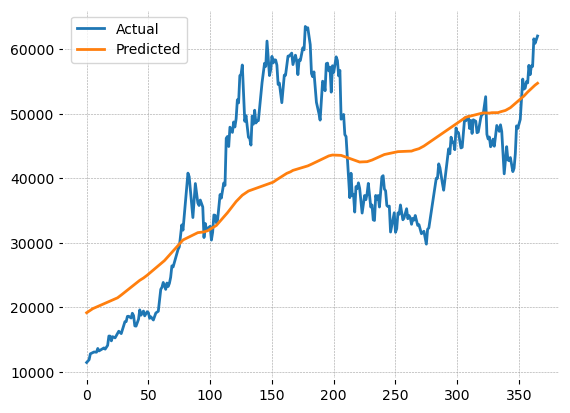

In [51]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# Forecasting Future Data w/ Tuned Model

In [52]:
#define the period for which we want a prediction
#prediction over the next 100 days 
future2 = list()
start_date = date(2021, 10, 19)
end_date = date(2022, 1, 26)
delta = timedelta(days=1)
while start_date <= end_date:
    future2.append([start_date])
    start_date += delta
future2 = pd.DataFrame(future2)
future2.columns = ['ds']
future2['ds']= to_datetime(future2['ds'])

In [53]:
# use the model to make a forecast
forecast2 = t_model.predict(future2)
# summarize the forecast
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 2021-10-19  54795.901388  49517.242786  59975.160198
1 2021-10-20  54947.540716  49852.236309  59949.510386
2 2021-10-21  55047.148205  50206.089545  60129.115941
3 2021-10-22  55238.626254  50180.277939  60568.061297
4 2021-10-23  55324.006641  50160.378297  60283.035774


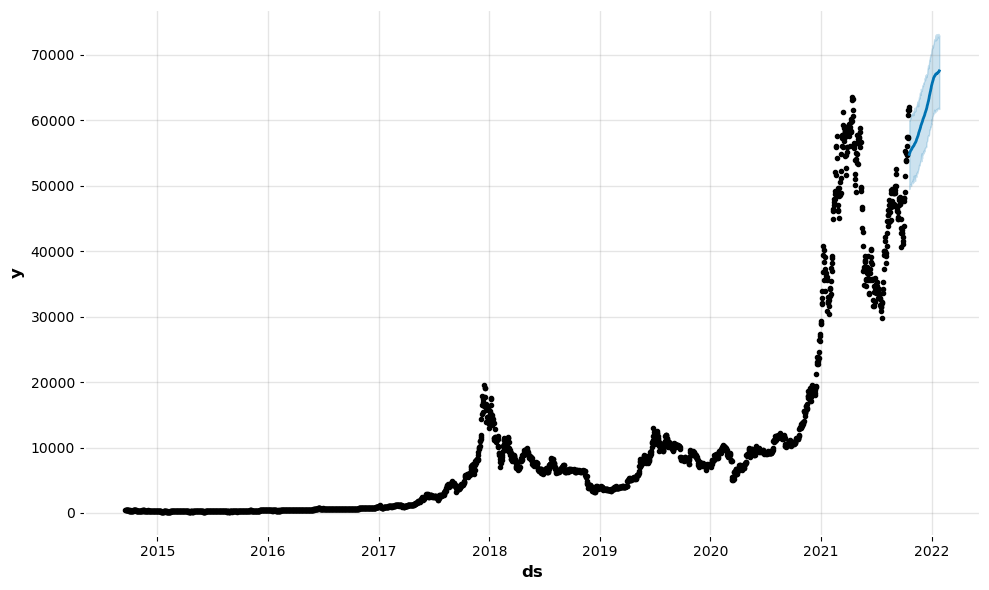

In [54]:
# plot forecast
t_model.plot(forecast2)
plt.show()

Real time series frequently have abrupt changes in their trajectories. By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately.

Prophet Documentation:
https://facebook.github.io/prophet/docs/trend_changepoints.html#automatic-changepoint-detection-in-prophet

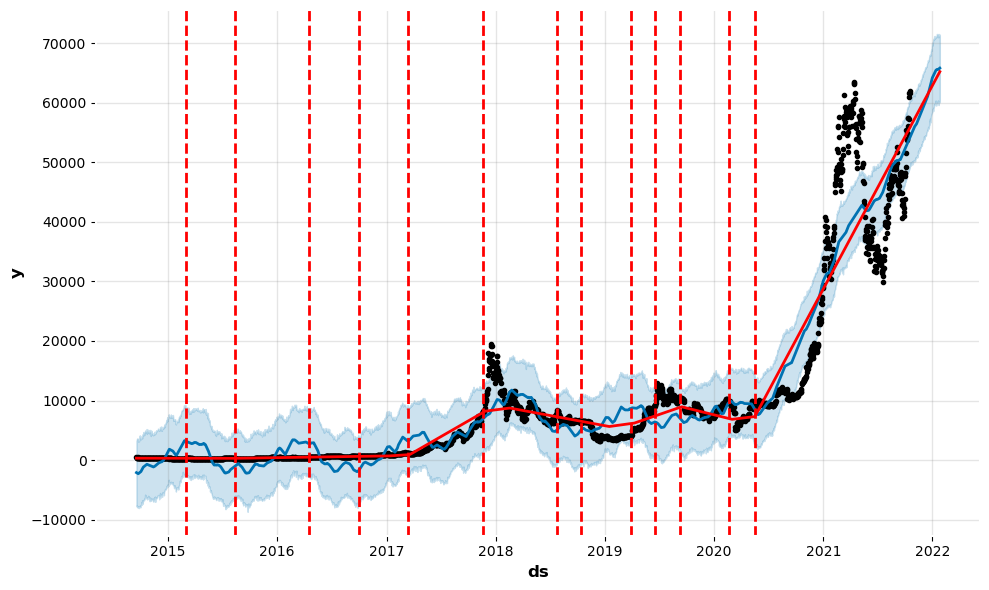

In [55]:
fig = t_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), t_model, forecast)

In [56]:
print(t_model.changepoints)

83     2014-12-09
165    2015-03-01
248    2015-05-23
331    2015-08-14
413    2015-11-04
496    2016-01-26
579    2016-04-18
661    2016-07-09
744    2016-09-30
827    2016-12-22
909    2017-03-14
992    2017-06-05
1075   2017-08-27
1158   2017-11-18
1240   2018-02-08
1323   2018-05-02
1406   2018-07-24
1488   2018-10-14
1571   2019-01-05
1654   2019-03-29
1736   2019-06-19
1819   2019-09-10
1902   2019-12-02
1984   2020-02-22
2067   2020-05-16
Name: ds, dtype: datetime64[ns]


Dates above can be researched to see what outside sources may have caused the change

# Cross Validation

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point.

This cross validation procedure can be done automatically for a range of historical cutoffs using the cross_validation function. We specify the forecast horizon (horizon), and then optionally the size of the initial training period (initial) and the spacing between cutoff dates (period).

The output of cross_validation is a dataframe with the true values y and the out-of-sample forecast values yhat, at each simulated forecast date and for each cutoff date. In particular, a forecast is made for every observed point between cutoff and cutoff + horizon.

In [57]:
df_cv = cross_validation(t_model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 9 forecasts with cutoffs between 2016-11-08 00:00:00 and 2020-10-18 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-11-09,718.292782,690.018723,744.514528,723.273010,2016-11-08
1,2016-11-10,720.677264,694.224294,748.071383,715.533997,2016-11-08
2,2016-11-11,722.895056,695.674096,749.328943,716.411011,2016-11-08
3,2016-11-12,724.827113,699.206261,754.190537,705.054016,2016-11-08
4,2016-11-13,725.981629,698.278129,754.070215,702.031006,2016-11-08


The performance_metrics utility can be used to compute some useful statistics of the prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff (how far into the future the prediction was). The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), median absolute percent error (MDAPE) and coverage of the yhat_lower and yhat_upper estimates.

In [58]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,8.178018e+06,2859.723447,1821.166048,0.217213,0.174588,0.429154
1,38 days,8.815288e+06,2969.055105,1887.386974,0.223037,0.174588,0.428135
2,39 days,9.398296e+06,3065.664018,1950.893815,0.229169,0.179448,0.428135
3,40 days,9.908548e+06,3147.784690,2010.493495,0.235085,0.186389,0.426096
4,41 days,1.045838e+07,3233.941716,2071.981791,0.241001,0.192002,0.423038


Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots.

The MAPE (Mean Absolute Percent Error) measures the size of the error in percentage terms (easy interpretation). It is calculated as the average of the unsigned percentage error.

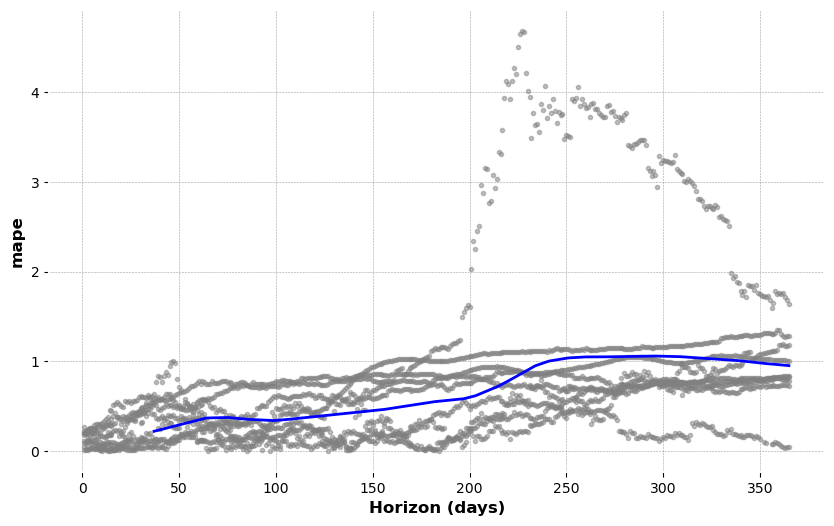

In [59]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

We see for this forecast that errors around 2-3% are typical for predictions one month into the future, and that errors increase up to around 11% for predictions that are a 9 months out and decrease to 10% as it gets closer to 1 year.

The size of the rolling window can be changed with the optional argument rolling_window, which specifies the proportion of forecasts to use in each rolling window. The default is 0.1, corresponding to 10% of rows from df_cv included in each window; increasing this will lead to a smoother average curve in the figure. 

# Adding Regressors

In [62]:
bc_prophet = bc[['Date','Adj Close']]
bc_prophet.columns = ['ds', 'y']

In [63]:
bc_prophet['Open'] = bc['Open']
bc_prophet['High'] = bc['High']
bc_prophet['Low'] = bc['Low']
bc_prophet['Volume'] = bc['Volume']
bc_prophet['Return'] = bc['Return']
bc_prophet=bc_prophet.dropna()
train_X= bc_prophet[:2100]
test_X= bc_prophet[2100:]

<ipython-input-63-169ec2bbbde6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_prophet['Open'] = bc['Open']
<ipython-input-63-169ec2bbbde6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_prophet['High'] = bc['High']
<ipython-input-63-169ec2bbbde6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [64]:
pro_regressor= Prophet(changepoint_prior_scale = 0.1)
pro_regressor.add_regressor('Open')
pro_regressor.add_regressor('High')
pro_regressor.add_regressor('Low')
pro_regressor.add_regressor('Volume')
pro_regressor.add_regressor('Return')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


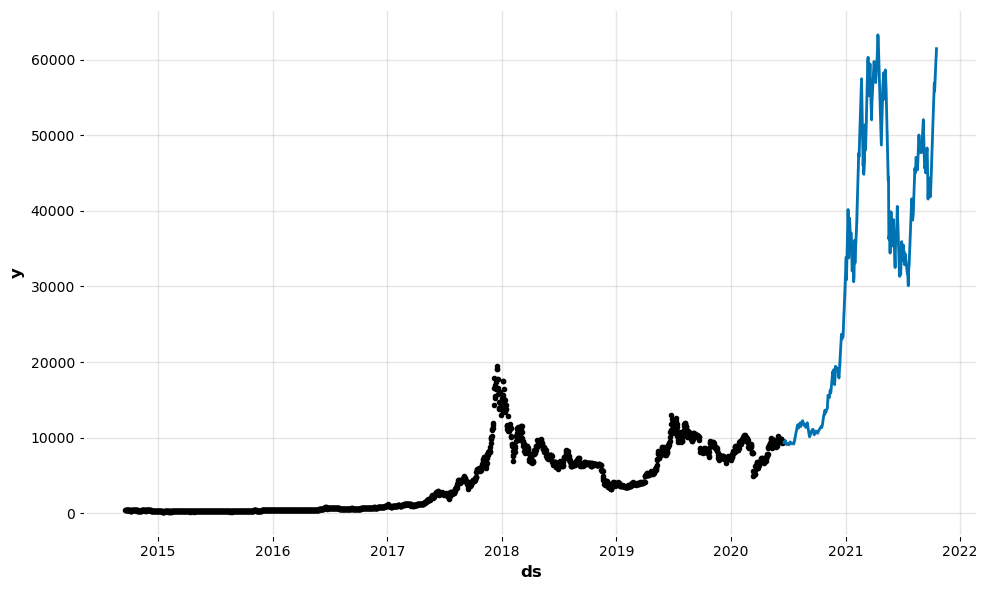

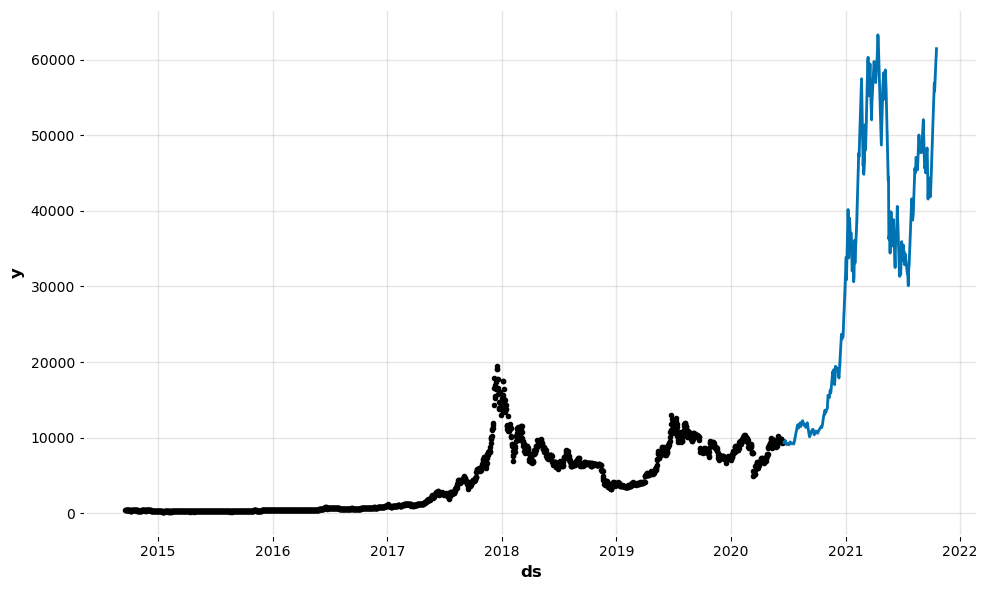

In [65]:
pro_regressor.fit(train_X)
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data)

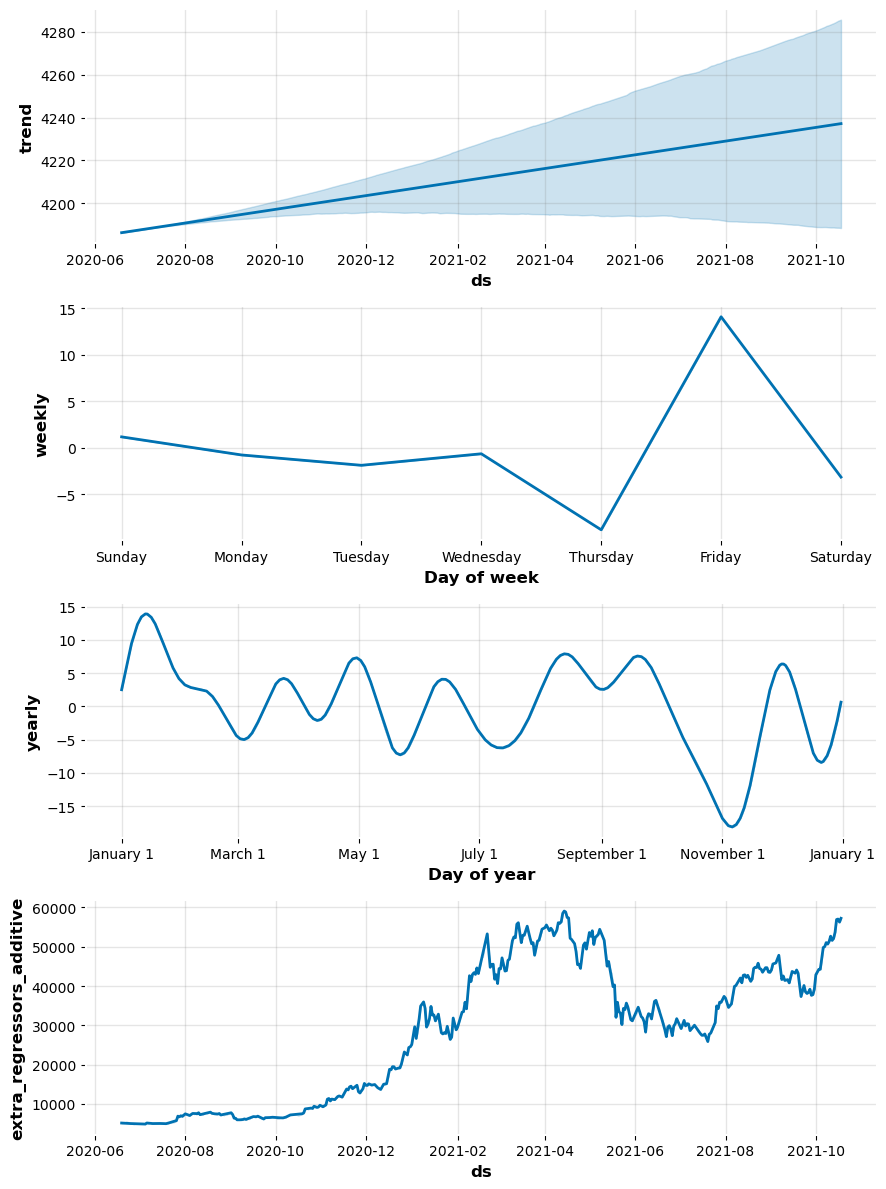

In [66]:
fig = pro_regressor.plot_components(forecast_data)

In [67]:
df_cv = cross_validation(pro_regressor, initial='100 days', period='180 days', horizon = '365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())

INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-01-11 00:00:00 and 2019-06-19 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,26100.491612,161.556466,81.930839,0.095770,0.011141,0.372527
1,38 days,27566.315664,166.031068,84.324454,0.098770,0.011204,0.370879
2,39 days,27647.337327,166.274885,85.124614,0.101565,0.011219,0.365385
3,40 days,27662.422189,166.320240,85.366144,0.103454,0.011219,0.362637
4,41 days,27951.965893,167.188414,86.066205,0.105235,0.011377,0.359890


,horizon,mse,rmse,mae,mape,mdape,coverage
324,361 days,65714.697830,256.348782,176.882131,0.122743,0.021994,0.356044
325,362 days,65783.049139,256.482064,177.729031,0.122162,0.021994,0.346154
326,363 days,66421.382715,257.723462,178.593865,0.121655,0.021514,0.342308
327,364 days,67724.646081,260.239594,181.076501,0.121633,0.022527,0.337912
328,365 days,68202.971876,261.156987,181.703520,0.121392,0.022226,0.336813


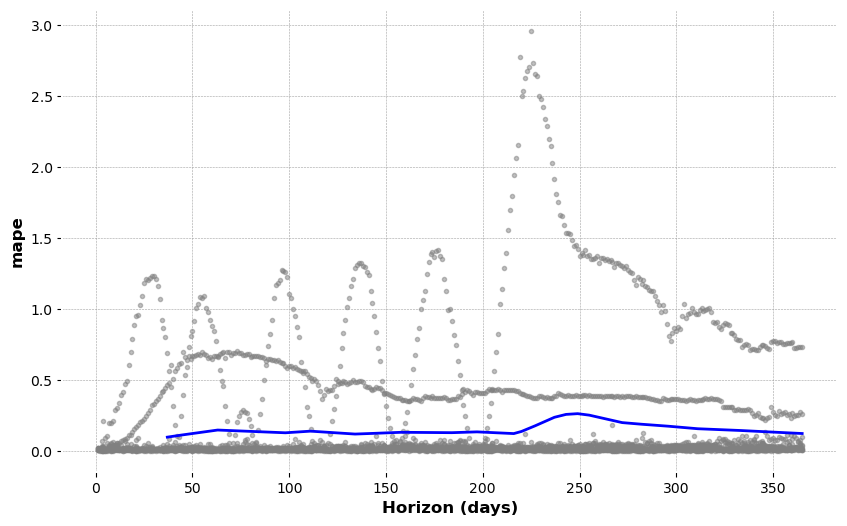

In [68]:
fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
plt.show()